### Student Information
Name: Hugo Rodriguez

Student ID: 108065430

GitHub ID: hugorodriguez92

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [4]:
### Begin Assignment Here
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

### ** >>> Take home exercises** 


In [19]:
# import libraries
import pandas as pd
import numpy as np
import plotly as py
import math
%matplotlib inline
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# PCA to reduce dimension
from sklearn.decomposition import PCA

from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# visualization of data 
import plotly.graph_objects as go
import seaborn as sns
from mpl_toolkits import mplot3d
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from plotly import tools

##exercises
# personal
import helpers.data_mining_helpers as dmh

# preparation of data set
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# dataframe list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# dataframe category
X['category'] = twenty_train.target

# category label
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 

In [5]:
#using .loc for boolean  (all coloumns) see one more technique below
X.loc[X.category_name=='sci.med', :]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
29,From: spp@zabriskie.berkeley.edu (Steve Pope) ...,2,sci.med
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
32,From: doyle+@pitt.edu (Howard R Doyle) Subject...,2,sci.med
34,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
44,From: rgasch@nl.oracle.com (Robert Gasch) Subj...,2,sci.med


In [6]:
#using .ix for selection of label and position (generally not recommended)
#see one more below
X.ix[0:2,0:2]

C:\Users\Tanisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3


In [7]:
#using callable and displaying the rows which column 'category' values are greater than 2
X.loc[lambda X:X.category > 2, :]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
18,From: tom_milligan@rainbow.mentorg.com Subject...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
22,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
26,From: christian@geneva.rutgers.edu Subject: en...,3,soc.religion.christian


### ** >>> Exercise 5 (take home):** 

In [ ]:
#Answer here

'''
The example has NaN and None as strings which .isnull() won't consider them. 
'null' is not understood by Python to represent a None or NaN. 

.isnull(self) method will only return True if a value is missing
By using this method, it doesn't know what value is inside the string.
'''

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
'''Other than the missing value from the dummy series still being there, I don't see many changes to the state of X dataframe.
It remains unchanged.
#Based on my research you should be able to see the changes to the data frame by any(DATAFRAME_new != DATAFRAME_current) == True,
#When creating a new dataframe to compare with the current one, obviously all the changes to the new one are not the same.
'''

In [8]:
#quering
len(X)

2257

In [9]:
X_sample = X.sample(n=1000)

In [10]:
len(X_sample)

1000

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

AxesSubplot(0.125,0.125;0.775x0.755)


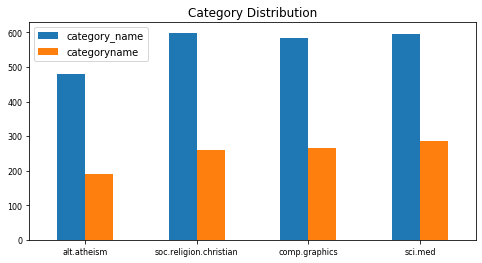

In [114]:
# Answer here
sample_counts = X_sample.category_name.value_counts()
actual_counts = X.category_name.value_counts()

combined_data_frame = pd.DataFrame({'category_name': actual_counts,
                    'categoryname': sample_counts}, index = categories)

print(combined_data_frame.plot.bar(title = 'Category Distribution', rot = 0, fontsize = 8, figsize = (8,4)))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [16]:
# Answer here
array = X_counts[4:10, 0:100].toarray() #show record no.10


for word in count_vect.inverse_transform(array)[0]:
    print('word: %s' % word)

word: 00
word: 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

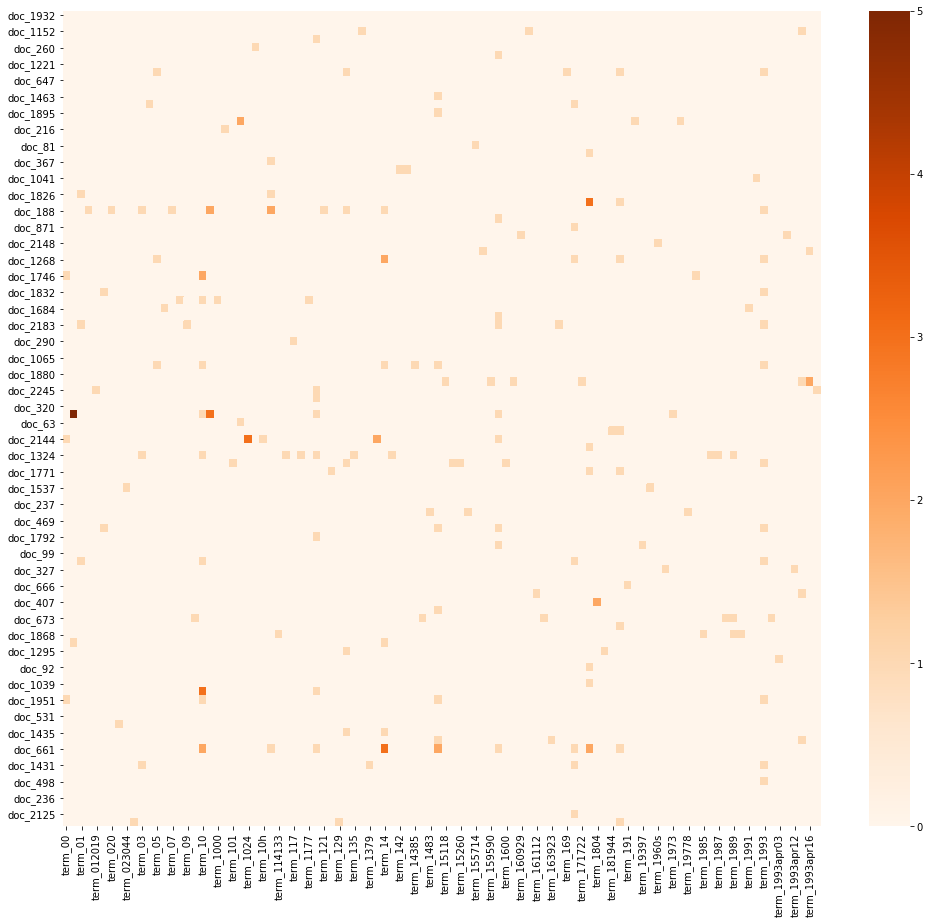

In [135]:
'''
Here I'm using terms that have a higher frequency and it's more than the 20 (100) articles and terms selected in the previous example.
In order to make it less cluttered we can remove vmax. It will also show more colors as they values vary so we can remove the number labels.
A sample was used to create a small matrix.

'''
n = 100
sample_X = X.sample(n=n, random_state = 24)
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sample_X.text)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df_todraw,
                 cmap="Oranges",
                 vmin=0, annot=False)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Dimension:
(2257, 3)


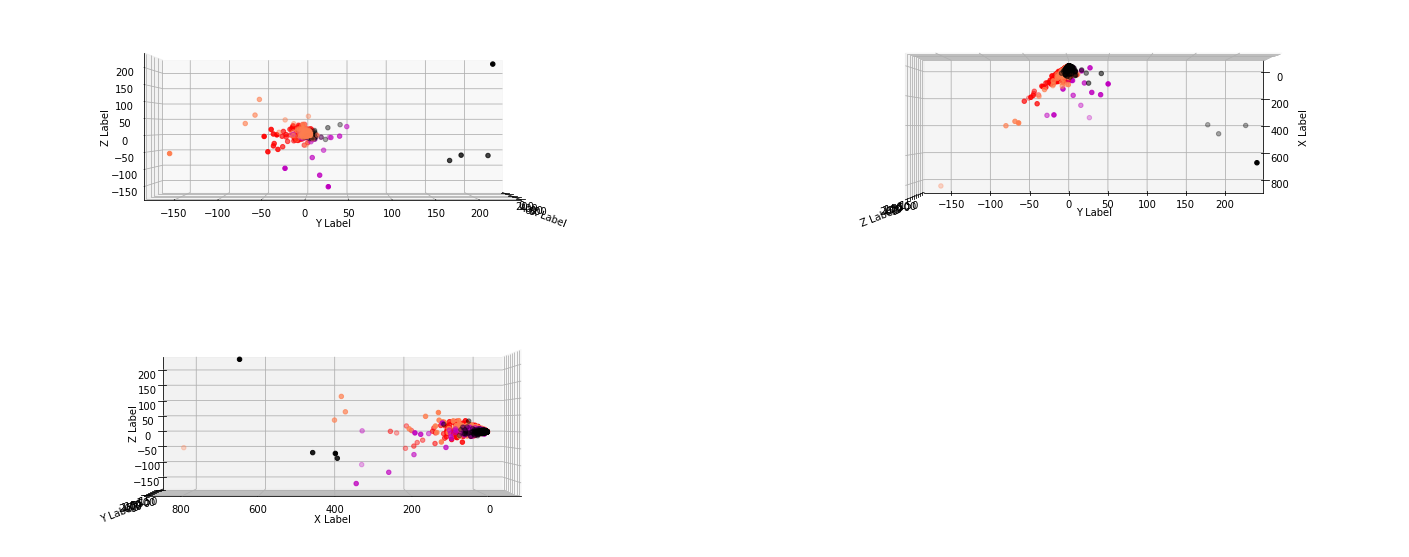

In [180]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print('Dimension:')
print(X_reduced3.shape)

col = ['coral', 'red', 'black', 'm']
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax2.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax3.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax4.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 0)
    
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(0, 0)



ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(0, 90)



plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [28]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


In [34]:
# Answer here
data = go.Bar(x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:280]], 
            y=term_frequencies[:280])

fig = go.Figure(data)

fig.update_layout(
    title=go.layout.Title(
        xref="paper",
        text="TERM FREQUENCY",
        x=0
    )
)

fig.show()



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [43]:
# Answer here
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
sample_term_frequencies_df = term_frequencies_df.sample(n=80, random_state=26)

sample_data = go.Bar(x = ["term_"+str(i) for i in sample_term_frequencies_df['terms']],
            y=sample_term_frequencies_df['counts'])

fig = go.Figure(sample_data)

fig.update_layout(
    title=go.layout.Title(
        text="NUMBER OF TERMS REDUCED",
        xref="paper",
        x=0
    )
)

fig.show()

#plotly requires concatenation

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [48]:
# Answer here

ordered_data = go.Bar(x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts'])
ordered_term_frequencies_df = sample_term_frequencies_df.sort_values(by = 'counts', ascending = False)

fig = go.Figure(ordered_data)

fig.update_layout(
    title=go.layout.Title(
        text="Terms sorted on the X-axis by frequency",
        xref="paper",
        x=0
    )
)

fig.show()

#sample was used
#the term frequency was ordered to make it look more organized

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [62]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


In [50]:
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


### >>> 2. New Data Set:**

In [63]:
#python array
sentiment_dataframe_array = []
with open("sentiment_labelled_sentences/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_dataframe_array += [string + '\tamazon' for string in amazon_data.read().split('\n')]
with open("sentiment_labelled_sentences/imdb_labelled.txt","r") as imdb_data:
    sentiment_dataframe_array += [string + '\timdb' for string in imdb_data.read().split('\n')]
with open("sentiment_labelled_sentences/yelp_labelled.txt","r") as yelp_data:
    sentiment_dataframe_array += [string + '\tyelp' for string in yelp_data.read().split('\n')]

#dictionary also as part of the helpers
sentiment_dataframe = dmh.sentiment_dataframe_dictionary(sentiment_datas_array)

In [64]:
# dataframe
sentiment_dataframe_df = pd.DataFrame.from_records(data = {"sentence":sentiment_dataframe['sentences'], "score":sentiment_dataframe['scores'], "source":sentiment_dataframe['sources']})

### 3.2 Familiarizing yourself with the Data

In [65]:
#length of dataframe
len(sentiment_dataframe_df)

3000

In [66]:
### First 10 records from dataframe
sentiment_dataframe_df[:10]

,score,sentence,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon
5,0,I have to jiggle the plug to get it to line up...,amazon
6,0,If you have several dozen or several hundred c...,amazon
7,1,If you are Razr owner...you must have this!,amazon
8,0,"Needless to say, I wasted my money.",amazon
9,0,What a waste of money and time!.,amazon


In [67]:
# using loc (by position)
# query every 10th record in df, contains 10 first records too
sentiment_dataframe_df.iloc[::10, 0:2][0:10]

,score,sentence
0,0,So there is no way for me to plug it in here i...
10,1,And the sound quality is great.
20,0,I went on Motorola's website and followed all ...
30,0,"This is a simple little phone to use, but the ..."
40,1,"It has a great camera thats 2MP, and the pics ..."
50,0,Not loud enough and doesn't turn on like it sh...
60,0,Essentially you can forget Microsoft's tech su...
70,0,Mic Doesn't work.
80,1,I wear it everyday and it holds up very well.
90,0,For a product that costs as much as this one d...


In [74]:
# using loc (by label)
sentiment_dataframe_df.loc[::10, ][0:10]

,score,sentence,source
0,0,So there is no way for me to plug it in here i...,amazon
10,1,And the sound quality is great.,amazon
20,0,I went on Motorola's website and followed all ...,amazon
30,0,"This is a simple little phone to use, but the ...",amazon
40,1,"It has a great camera thats 2MP, and the pics ...",amazon
50,0,Not loud enough and doesn't turn on like it sh...,amazon
60,0,Essentially you can forget Microsoft's tech su...,amazon
70,0,Mic Doesn't work.,amazon
80,1,I wear it everyday and it holds up very well.,amazon
90,0,For a product that costs as much as this one d...,amazon


### 3.2 Data mining using Pandas (Data exploration)

In [76]:
#missing values
sentiment_dataframe_df.isnull()

,score,sentence,source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [77]:
#checking for missing values
sentiment_dataframe_df.isnull().apply(lambda x: dmh.check_missing_values(x))


score       (The amoung of missing records is: , 0)
sentence    (The amoung of missing records is: , 0)
source      (The amoung of missing records is: , 0)
dtype: object

In [79]:
#checking for duplicates
sentiment_dataframe_df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [80]:
#checking sum of duplicates
sum(sentiment_dataframe_df.duplicated())

17

###  Sampling

In [83]:
records = 800
sentiment_dataframe_sample = sentiment_dataframe_df.sample(n=records, random_state=26)

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
print(sentiment_dataframe_df.category_name.value_counts())

# plot barchart for X_sample
sentiment_dataframe_df.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

AttributeError: 'DataFrame' object has no attribute 'category_name'

AxesSubplot(0.125,0.125;0.775x0.755)


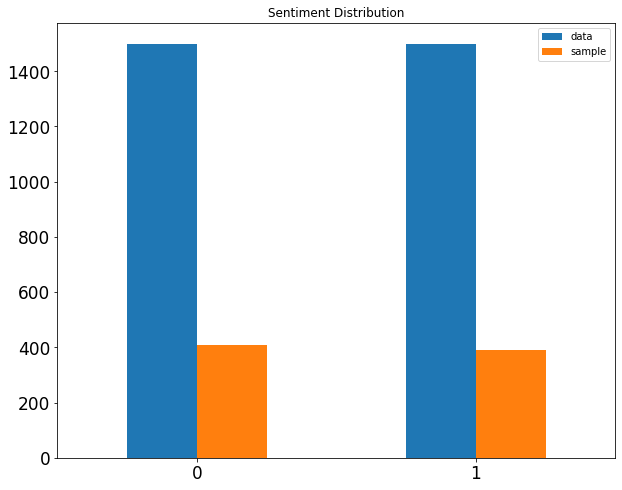

In [89]:
#barchart combined
sample_counts = sentiment_dataframe_sample.score.value_counts()
actual_counts = sentiment_dataframe_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 17, figsize = (10,8), tick_label = ['negative', 'positive']))

###  Feature creation

In [102]:
#unigrams

sentiment_dataframe_df['unigrams'] = sentiment_dataframe_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [103]:
#unigrams examples
sentiment_dataframe_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [104]:
#unigram list

list(sentiment_dataframe_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [106]:
# transorfmed the articles into a term-document matrix

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_dataframe_df_counts = count_vect.fit_transform(sentiment_dataframe_df.sentence)

In [108]:
#analyze the first record of our dataframe with the new analyzer 
analyze = count_vect.build_analyzer()
analyze(" ".join(list(sentiment_dataframe_df[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [115]:
# We can check the shape of this matrix by:
sentiment_dataframe_df_counts.shape

(3000, 5159)

In [116]:
#transform documents into document term matrix
sentiment_dataframe_df[0:5]

,score,sentence,source,unigrams
0,0,So there is no way for me to plug it in here i...,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,1,"Good case, Excellent value.",amazon,"[Good, case, ,, Excellent, value, .]"
2,1,Great for the jawbone.,amazon,"[Great, for, the, jawbone, .]"
3,0,Tied to charger for conversations lasting more...,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,1,The mic is great.,amazon,"[The, mic, is, great, .]"


In [117]:
# we convert from sparse array to normal array
sentiment_dataframe_df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [118]:
#heatmap of our term document matrix
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [119]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [121]:
#obtain document index
plot_y = ["doc_"+ str(i) for i in list(sentiment_dataframe_df.index)[0:20]]

In [123]:
plot_z = sentiment_dataframe_df_counts[0:20, 0:20].toarray()

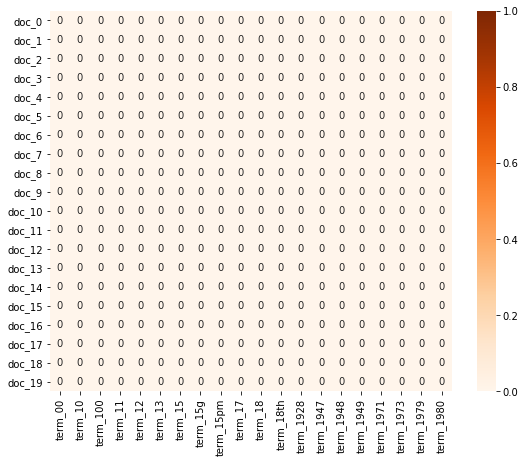

In [134]:
#heatmap using seaborn

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="Oranges",
                 vmin=0, vmax=1, annot=True)

### Reduction of dimensionality 

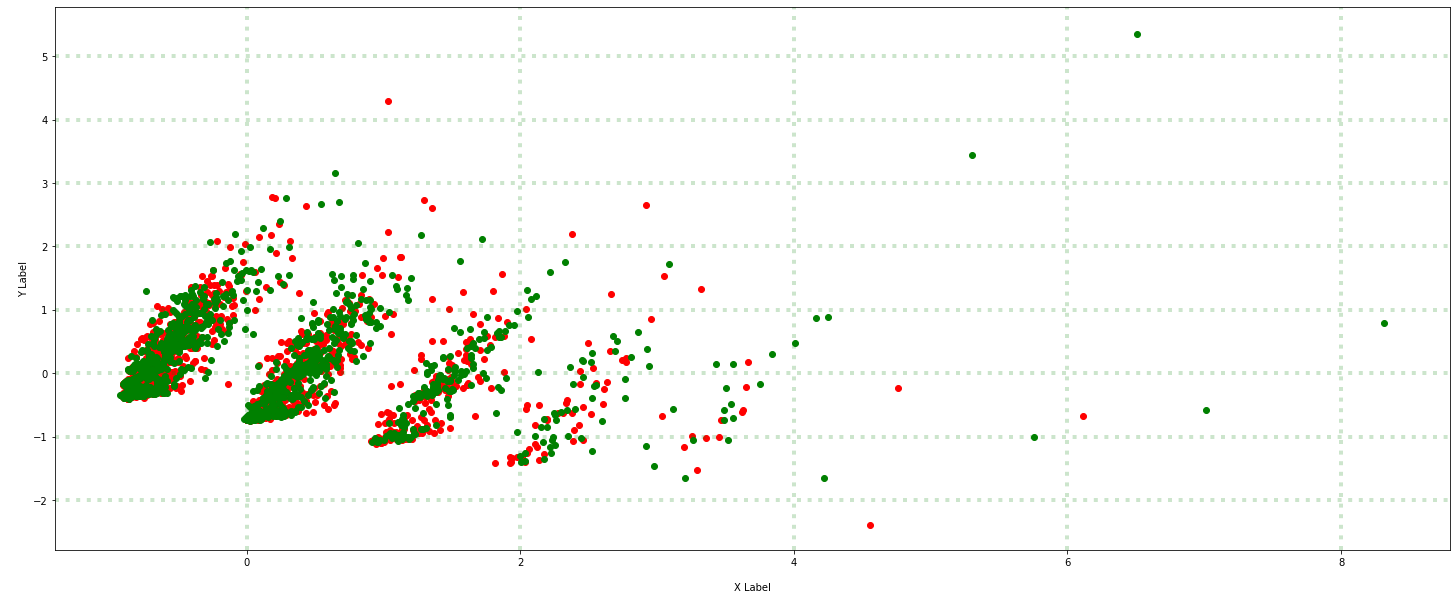

In [130]:
#utilizing PCA in two dimensions
frequency_counts = count_vect.fit_transform(sentiment_data_df.sentence)
colors = ['red', 'green']
scores = ['0','1']

sentiment_data_reduced2 = PCA(n_components = 2).fit_transform(frequency_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='green', linestyle=':', linewidth=4, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Atrribute Transformation / Aggregation


In [147]:
#term frequencies

count_vect = CountVectorizer()
sentiment_data_df_counts = count_vect.fit_transform(sentiment_data_df.sentence)

term_frequencies = []
for j in range(0,sentiment_data_df_counts.shape[1]):
    term_frequencies.append(sum(sentiment_data_df_counts[:,j].toarray()))

In [148]:
term_frequencies = np.asarray(sentiment_data_df_counts.sum(axis=0))[0]

In [150]:
#term frequency
term_frequencies[0]

1

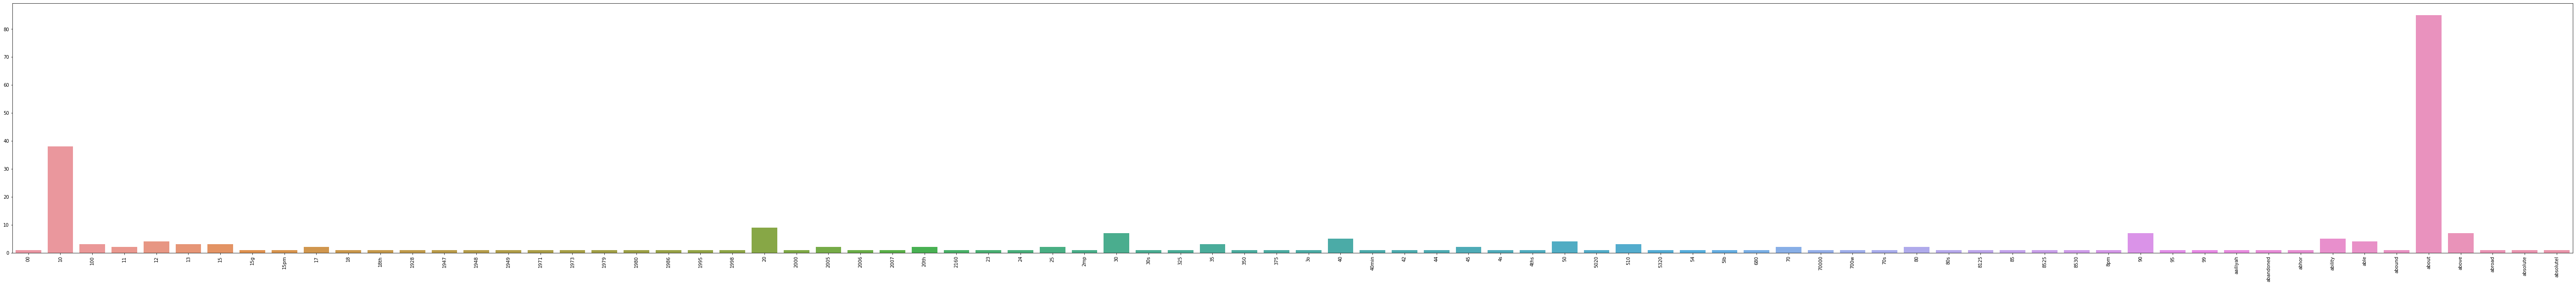

In [153]:
#plot term frequency
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:80], 
            y=term_frequencies[:80])
g.set_xticklabels(count_vect.get_feature_names()[:80], rotation = 90);

### Binarization

In [156]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_data_df.source)
sentiment_dataframe_df['bin_source'] = mlb.transform(sentiment_dataframe_df['source']).tolist()

In [159]:
# 15 first rows rows
sentiment_data_df[0:15]

,score,sentence,source,bin_source
0,0,So there is no way for me to plug it in here i...,amazon,"[1, 0, 0]"
1,1,"Good case, Excellent value.",amazon,"[1, 0, 0]"
2,1,Great for the jawbone.,amazon,"[1, 0, 0]"
3,0,Tied to charger for conversations lasting more...,amazon,"[1, 0, 0]"
4,1,The mic is great.,amazon,"[1, 0, 0]"
5,0,I have to jiggle the plug to get it to line up...,amazon,"[1, 0, 0]"
6,0,If you have several dozen or several hundred c...,amazon,"[1, 0, 0]"
7,1,If you are Razr owner...you must have this!,amazon,"[1, 0, 0]"
8,0,"Needless to say, I wasted my money.",amazon,"[1, 0, 0]"
9,0,What a waste of money and time!.,amazon,"[1, 0, 0]"


In [161]:
#last 20 rows
sentiment_data_df[-20:]


,score,sentence,source,bin_source
2980,0,I have been to very few places to eat that und...,yelp,"[0, 0, 1]"
2981,0,We started with the tuna sashimi which was bro...,yelp,"[0, 0, 1]"
2982,0,Food was below average.,yelp,"[0, 0, 1]"
2983,0,It sure does beat the nachos at the movies but...,yelp,"[0, 0, 1]"
2984,0,"All in all, Ha Long Bay was a bit of a flop.",yelp,"[0, 0, 1]"
2985,0,The problem I have is that they charge $11.99 ...,yelp,"[0, 0, 1]"
2986,0,Shrimp- When I unwrapped it (I live only 1/2 a...,yelp,"[0, 0, 1]"
2987,0,"It lacked flavor, seemed undercooked, and dry.",yelp,"[0, 0, 1]"
2988,0,It really is impressive that the place hasn't ...,yelp,"[0, 0, 1]"
2989,0,I would avoid this place if you are staying in...,yelp,"[0, 0, 1]"


### 3. TF-IDF MATRIX

In [163]:
tf_idf_vect = TfidfVectorizer()
tf_idf_counts = tf_idf_vect.fit_transform(sentiment_data_df.sentence)

print('5 Feature Names in order of appearance:', tf_idf_vect.get_feature_names()[0:5])
print('TF-IDF :', tf_idf_counts.shape)

5 Feature Names in order of appearance: ['00', '10', '100', '11', '12']
TF-IDF : (3000, 5159)


In [179]:
#TOP 10  TOP 10 TF vs TF-IDF 
n = 10
term_tf_idf = np.asarray(tf_idf_counts.sum(axis=0))[0]
term_tf_idf_df = pd.DataFrame({'terms': tf_idf_vect.get_feature_names(), 
                                            'counts': term_tf_idf})
ordered_term_tf_idf_df = term_tf_idf_df.sort_values(by = 'counts', ascending = False)

fig = make_subplots(rows=1, cols=2)


fig.add_trace(
    go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms'][:n]],
            y=ordered_term_frequencies_df['counts'][:n],
            name = "Count of W"),            
            row=1, col=2
)
fig.add_trace(
    go.Bar(
            x=["term_"+str(i) for i in ordered_term_tf_idf_df['terms']][:n],
            y=ordered_term_tf_idf_df['counts'][:n],
            name = "TF-IDF"),            
            row=1, col=1
)

fig.update_layout(height=500, width=800, title_text="TOP 10 TF vs TF-IDF")
fig.show()


### 4 Naive Bayes Classifier


In [173]:
#Naive Bayes classifiers
#TF-IDF
mnb_tf_idf = MultinomialNB()
mnb_tf_idf.fit(tf_idf_counts, sentiment_dataframe_df['score'].values)

#term frequency
mnb_term_frequency = MultinomialNB()
mnb_term_frequency.fit(frequency_counts, sentiment_dataframe_df['score'].values)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [178]:
#accuracy test with random sentence
## Still unfamiliar with the Bayes Classifier complexity
real_sentence = sentiment_data_df.sample(n = 1)
print('Sent.:',real_sentence.iloc[0].sentence,'\nScore (real):', real_sentence.iloc[0].score)
real_sentence_index = real_sentence.index[0]
print('TF Prediction: ', mnb_term_frequency.predict(frequency_counts[real_sentence_index:real_sentence_index+1])[0])
print('TF-IDF Prediction: ', mnb_tf_idf.predict(tf_idf_counts[real_sentence_index:real_sentence_index+1])[0])


Sent.: I can say that the desserts were yummy. 
Score (real): 1
TF Prediction:  1
TF-IDF Prediction:  1


### How to improve the  the Data preprocessing 

Each dataset can be preprocessed differently depending on the type of data itself. Once in the lab and due to time constraints, the way presented seemed like the most efficient way to deal with the data. However, the depending on the origin of the data the preprocessing ways can vary. For example: The first data set was composed of e-mails which contain more text than the sentences on the second data set. The way to present the data can also vary, for example the types of graphs differ depending on what we want to display so whoever is reading can make more sense of the information.